[0.    0.357]


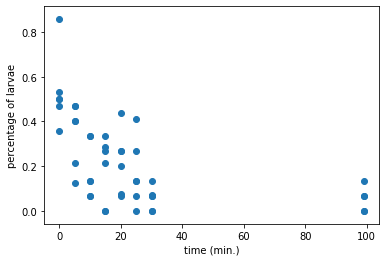

In [6]:
#importing flat files- txt, csv.

import numpy as np
import matplotlib.pyplot as plt

#import txt file. data as floats and skip the first row( consists of headers which are strings)
file = 'seaslug.txt'

data = np.loadtxt(file, delimiter = '\t', dtype = float, skiprows=1)

print(data[9])

#plot scatterplot of the data
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


In [7]:
import pandas as pd

In [9]:
#importing CSV  files

csv_file = 'titanic_sub.csv'

titanic_data = np.recfromcsv(csv_file, delimiter=',', names = True, dtype = None)

print(titanic_data[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


In [10]:
#importing pandas

xlsx_file = 'battledeath.xlsx'

#reading the file and assigning it to a variable
xls_data = pd.ExcelFile(xlsx_file)

#print the sheets within the file
print(xls_data.sheet_names)

['2002', '2004']


In [11]:
#reading sheet one by index
sheet1 = xls_data.parse(0)

print(sheet1.head())

#reading sheet two by name
sheet2 = xls_data.parse('2004')

print(sheet2.head())

  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560
  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931


In [12]:
#renaming columns and skipping rows and columns
sheet1 = xls_data.parse(0, skiprows = 1, names = ['Country', 'AAM due to War (2002)'])

print(sheet1.head())

sheet2 = xls_data.parse(1, skiprows = 1, usecols = [0],  names = ['Country'])

print(sheet2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


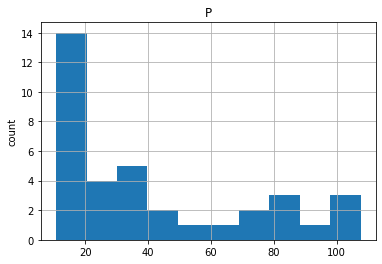

In [13]:
#Importing SAS files using sas7bdat package and pandas
from sas7bdat import  SAS7BDAT

with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

print(df_sas.head()) 


# create a histogram  of the dataframe features

pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

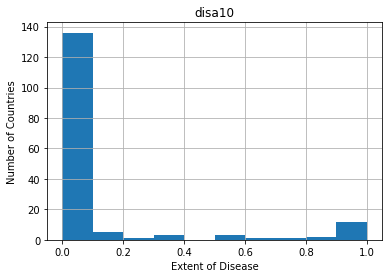

In [14]:
#importing .dta files
dta_df = pd.read_stata('disarea.dta')

print(dta_df.head())

pd.DataFrame.hist(dta_df[['disa10']])
plt.xlabel('Extent of Disease')
plt.ylabel('Number of Countries')
plt.show()

In [15]:
#import hdf5 -- hierarchical data 
import h5py

hfpy_file = 'LIGO.hdf5'

data = h5py.File(hfpy_file, 'r')

print(type(data))

#assess the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


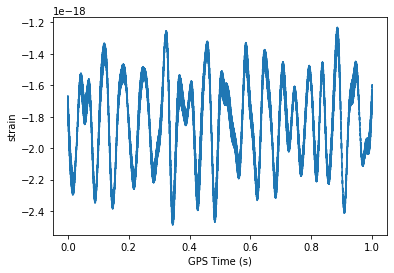

In [16]:
#extracting data from the HDF5  file
group = data['strain']

#check the group keys
for key in group.keys():
    print(key)
#    
strain = data['strain']['Strain'][()]

#set number of time points to sample
num_samples = 10000

#set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

In [20]:
## importing relational database data
#create a connection to 'Chinook.sqlite'
from sqlalchemy import create_engine

engine = create_engine('sqlite:///Chinook.sqlite')

#list the table names in Chinook
table_names = engine.table_names()

print(table_names)

##connect to the engine to access data from the database

with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()
    
# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df)    


['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']
5
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent
3     Park  Sales Support Agent
4  Johnson  Sales Support Agent


In [21]:
## using pandas to write sql results

pd_df = pd.read_sql_query('SELECT LastName, Title FROM Employee', engine)

print(pd_df.head())

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent
3     Park  Sales Support Agent
4  Johnson  Sales Support Agent
